# **Modelo de Clasificación: Airline Passenger Satisfaction**

Alumnas:
1. Leilani
2. Lucía
3. Natalia
4. Maria Jose
5. Maryam

### Dataset: [Airline Passenger Satisfaction](https://www.kaggle.com/datasets/nilanjansamanta1210/airline-passenger-satisfaction#)

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA

# Download latest version
path = kagglehub.dataset_download("nilanjansamanta1210/airline-passenger-satisfaction")

# Find the CSV file within the downloaded directory
csv_file = next((f for f in os.listdir(path) if f.endswith('.csv')), None)

# If a CSV file is found, construct the full file path
if csv_file:
    file_path = os.path.join(path, csv_file)

    # Pandas DataFrame
    df = pd.read_csv(file_path)

    print("DataFrame shape:", df.shape)
else:
    print("No CSV file found in the downloaded directory.")

df.head()

DataFrame shape: (129880, 24)


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


Utilizamos un conjunto de datos de Kaggle que contiene información sobre la experiencia de los pasajeros en vuelos.

El objetivo es clasificar si un pasajero está satisfecho o no en función de diferentes características del servicio recibido.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,393
Departure and Arrival Time Convenience,0


In [ ]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Decidimos eliminar las 393 filas con un valor nulo ya que los valores nulos solo representan un 0.3% del dataset. No afecta significativamente la cantidad de datos disponibles.


In [ ]:
df['Arrival Delay'].value_counts()

,count
Arrival Delay,
0.0,72753
1.0,2747
2.0,2587
3.0,2442
4.0,2373
...,...
1011.0,1
386.0,1
624.0,1


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
Gender,0
Age,0
Customer Type,0
Type of Travel,0
Class,0
Flight Distance,0
Departure Delay,0
Arrival Delay,0
Departure and Arrival Time Convenience,0


### Exploratorio de Datos

<ipython-input-14-8061c42113a2>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Age'], bins=30, kde=True, palette='PuBuGn', edgecolor='black')


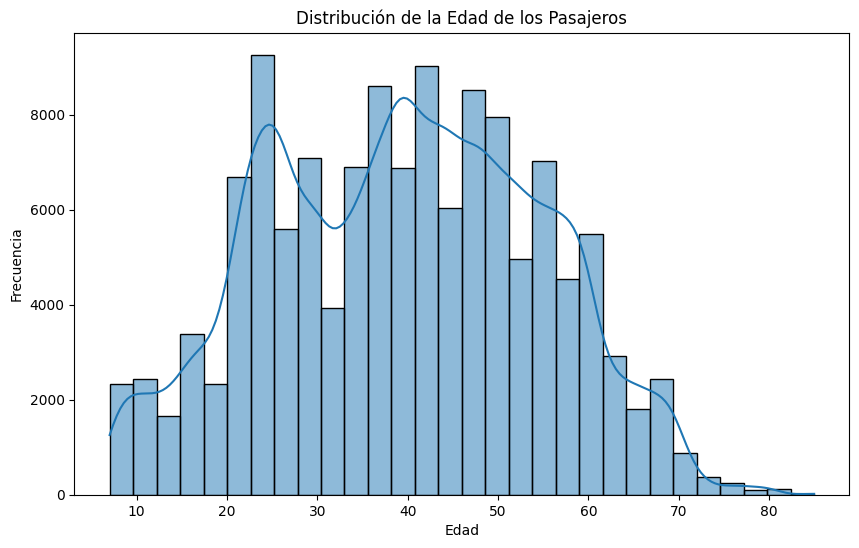

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, palette='PuBuGn', edgecolor='black')

plt.title('Distribución de la Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Analizamos la distribución de la edad de los pasajeros mediante un histograma. Observamos que la mayoría de los pasajeros tienen entre 20 y 50 años, con un segundo grupo notablemente joven (cerca de los 20 años). Esto sugiere que la edad podría influir en la satisfacción del cliente, ya que cada grupo etario podría tener diferentes expectativas respecto a los servicios ofrecidos.

<ipython-input-15-ffa1ba952229>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Satisfaction', data=df, palette='PuBuGn')


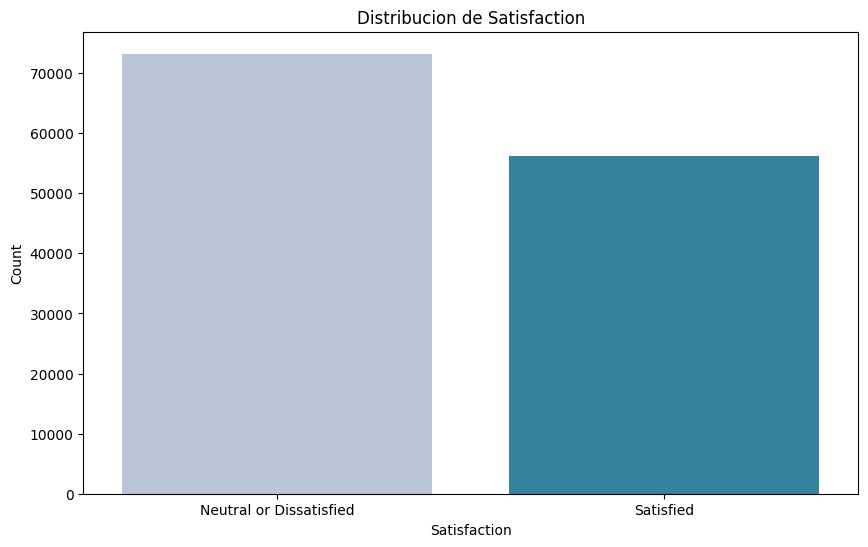

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction', data=df, palette='PuBuGn')

plt.title('Distribucion de Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Analizamos la distribución de la variable objetivo **Satisfaction**. Observamos que la clase '**Neutral or Dissatisfied**' tiene una mayor proporción en comparación con '**Satisfied**'.

<ipython-input-16-c564ece044a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='PuBuGn')


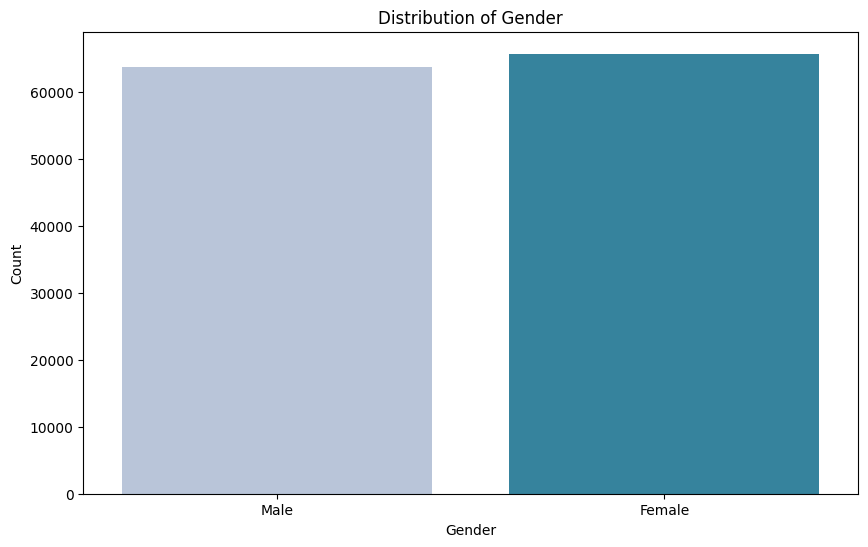

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='PuBuGn')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Analizamos la distribución de la variable Gender en el dataset. Observamos que la cantidad de hombres y mujeres es similar, lo que asegura un balance adecuado entre géneros.

<ipython-input-17-48b44224a50e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer Type', data=df, palette='PuBuGn')


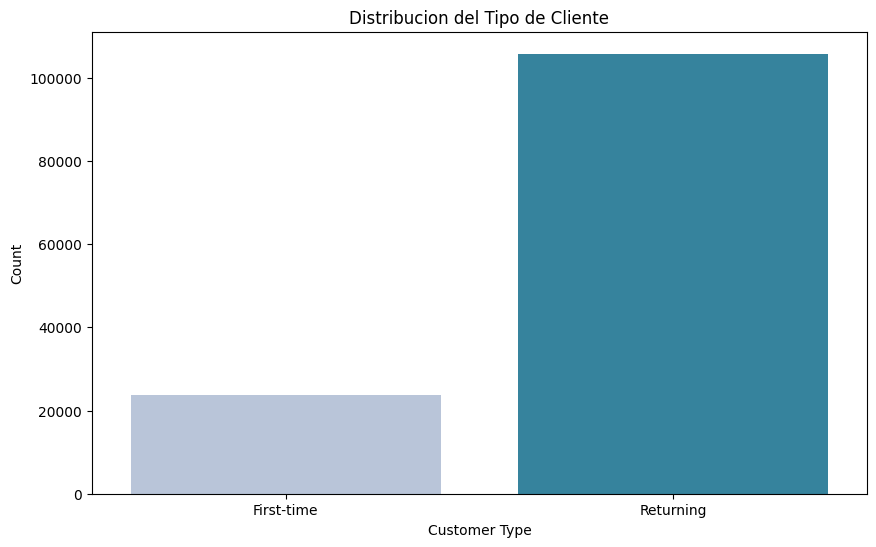

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Type', data=df, palette='PuBuGn')
plt.title('Distribucion del Tipo de Cliente')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

Observamos que la mayoría de los pasajeros son clientes recurrentes, mientras que los clientes de primera vez representan una minoría.

<ipython-input-18-1679421ccb63>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type of Travel', data=df, palette='PuBuGn')


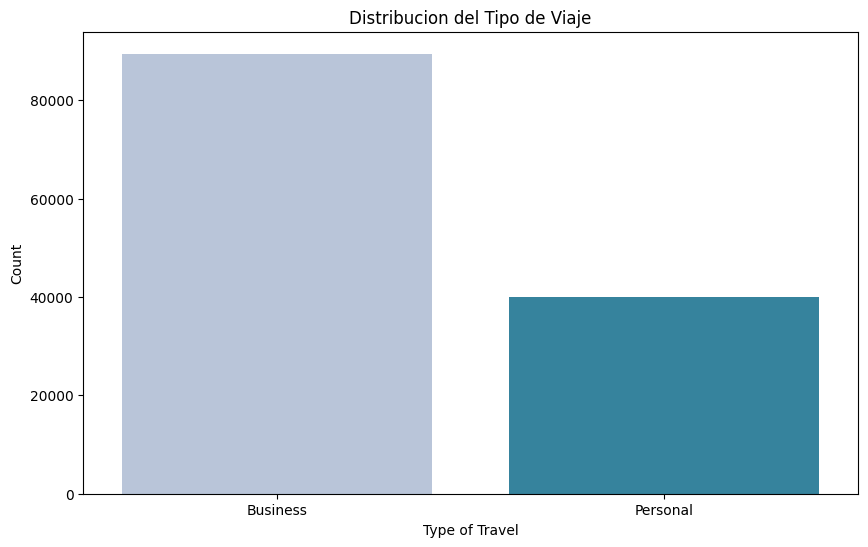

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Travel', data=df, palette='PuBuGn')
plt.title('Distribucion del Tipo de Viaje')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.show()

Observamos que más personas viajan por trabajo que por razones personales.

<ipython-input-19-fe30e4b3df4e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='PuBuGn')


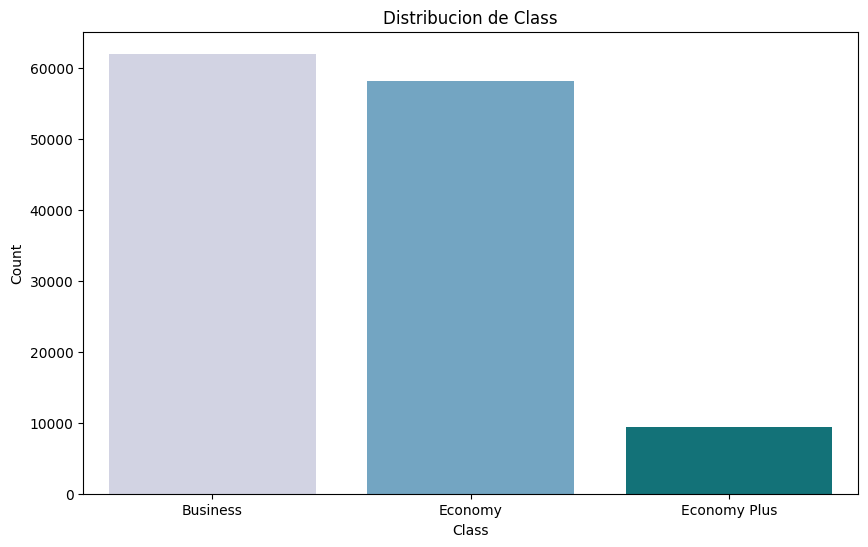

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df, palette='PuBuGn')
plt.title('Distribucion de Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Observamos que la clase Business es la opción más preferida por los pasajeros, mientras que Economy Plus resulta ser la menos seleccionada. Esto puede sugerir diferencias en el servicio recibido.

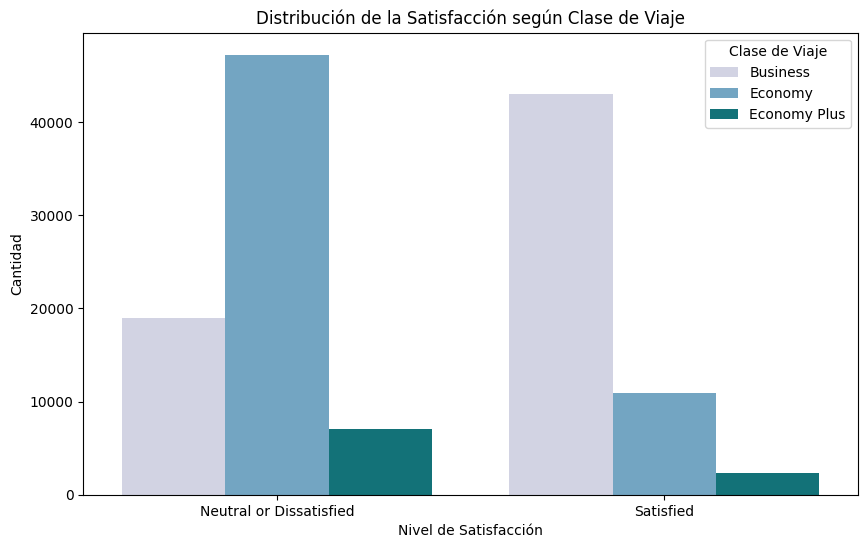

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Satisfaction', data=df, hue='Class', palette='PuBuGn')

plt.title('Distribución de la Satisfacción según Clase de Viaje')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Cantidad')
plt.legend(title='Clase de Viaje')
plt.show()


Los pasajeros de clase ejecutiva (Business) parecen estar más satisfechos en general, lo que probablemente refleja la calidad del servicio y las comodidades ofrecidas en esta clase.

La clase económica (Economy) tiene el mayor porcentaje de insatisfacción, posiblemente debido a las limitaciones en servicios y confort en comparación con las otras clases.

Economy Plus, aunque representa una minoría, muestra un nivel intermedio de satisfacción, destacando como una opción equilibrada para algunos pasajeros.

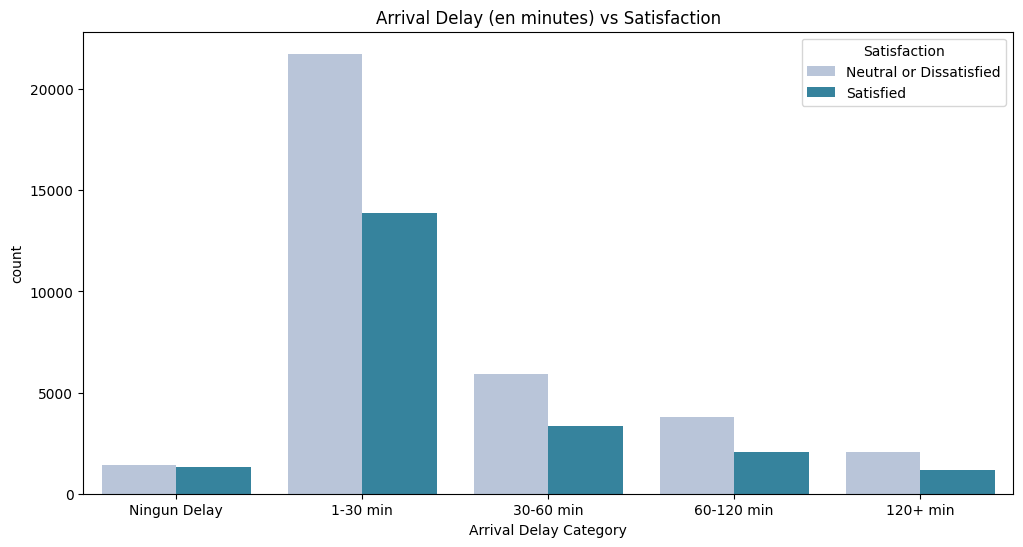

In [ ]:
df2 = df.copy()
df2['Arrival Delay Category'] = pd.cut(df2['Arrival Delay'],
                                      bins=[0, 1, 30, 60, 120, df['Arrival Delay'].max()],
                                      labels=['Ningun Delay', '1-30 min', '30-60 min', '60-120 min', '120+ min'])

plt.figure(figsize=(12, 6))
sns.countplot(x='Arrival Delay Category', hue='Satisfaction', data=df2, palette='PuBuGn')
plt.title('Arrival Delay (en minutes) vs Satisfaction')
plt.show()

Analizamos la relación entre los retrasos en la llegada y la satisfacción de los pasajeros. Observamos que los retrasos prolongados (más de 120 minutos) tienen un impacto negativo significativo, con una baja proporción de pasajeros satisfechos. Incluso los retrasos cortos (1-30 minutos) generan una mayor proporción de insatisfacción en comparación con aquellos que no experimentaron retrasos. Esto sugiere que la puntualidad es un factor crítico para la satisfacción del cliente.

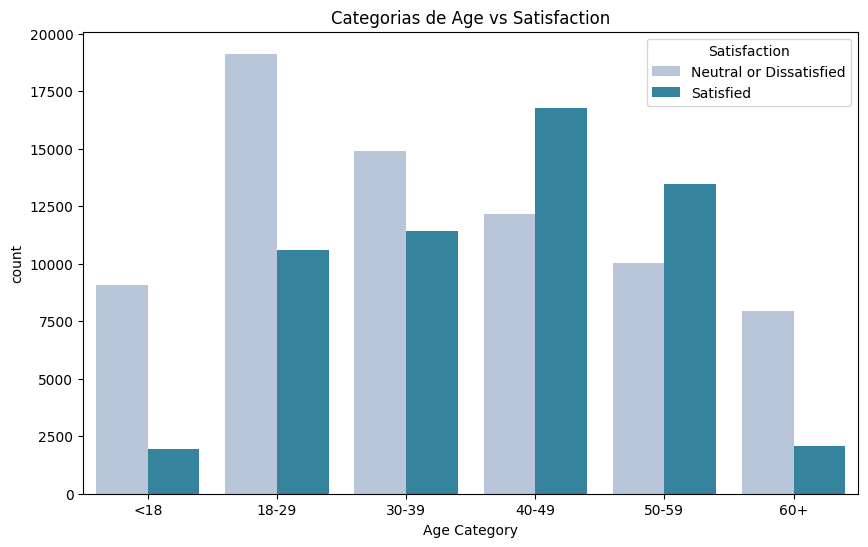

In [ ]:
df2['Age Category'] = pd.cut(df2['Age'], bins=[0, 18, 30, 40, 50, 60, 100],
                             labels=['<18', '18-29', '30-39', '40-49', '50-59' ,'60+'])

plt.figure(figsize=(10, 6))
sns.countplot(x='Age Category', hue='Satisfaction', data=df2, palette='PuBuGn')
plt.title('Categorias de Age vs Satisfaction')
plt.show()

Observamos que los clientes entre las edades de 40 a 59 tienden a estar más satisfechos con los servicios ofrecidos en los vuelos. Por el contrario, los pasajeros de otras edades, especialmente aquellos entre 18 y 29 años, muestran un mayor nivel de insatisfacción.

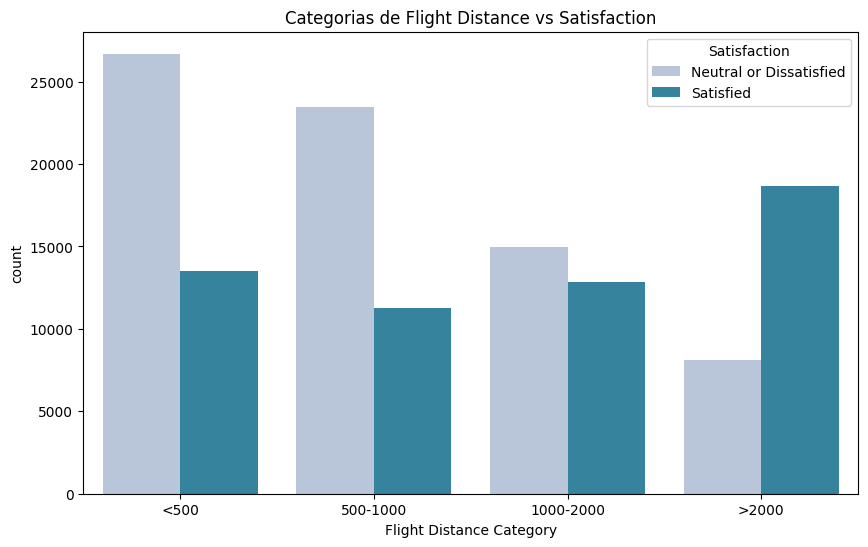

In [ ]:
df2['Flight Distance Category'] = pd.cut(df2['Flight Distance'], bins=[0, 500, 1000, 2000, 5000],
                                         labels=['<500', '500-1000', '1000-2000', '>2000'])

plt.figure(figsize=(10, 6))
sns.countplot(x='Flight Distance Category', hue='Satisfaction', data=df2, palette='PuBuGn')
plt.title('Categorias de Flight Distance vs Satisfaction')
plt.show()

Observamos que los vuelos cortos (<500 km) tienen una mayor proporción de pasajeros insatisfectos, mientras que los vuelos largos (>2000 km) presentan una mayor proporción de pasajeros satisfechos. Esto sugiere que la experiencia en vuelos largos podría ser más valorada, posiblemente debido a servicios más completos.

### One-Hot Enconding

Utilizamos One-Hot Encoding para la columna Class, que tiene múltiples categorías, convirtiéndola en columnas binarias. Además, aplicamos Label Encoding a las variables binarias, como Gender y Customer Type, para transformarlas en datos numéricos. Esto asegura que el modelo pueda interpretar correctamente las variables categóricas sin asumir una relación ordinal entre las categorías.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas a codificar con Label Encoding
label_cols = ["Gender", "Customer Type", "Type of Travel", "Satisfaction"]

# Aplicamos Label Encoding a cada columna categórica binaria
encoder = LabelEncoder()
for col in label_cols:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# Aplicamos One-Hot Encoding a "Class" (ya que tiene más de 2 categorías)
df = pd.get_dummies(df, columns=["Class"], drop_first=True)
df[df.columns[df.columns.str.startswith("Class")]] = df[df.columns[df.columns.str.startswith("Class")]].astype(int)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Class_Economy,Class_Economy Plus
0,1,1,48,0,0,821,2,5.0,3,3,...,2,5,5,5,3,5,5,0,0,0
1,2,0,35,1,0,821,26,39.0,2,2,...,5,5,3,5,2,5,5,1,0,0
2,3,1,41,1,0,853,0,0.0,4,4,...,3,5,5,3,4,3,3,1,0,0
3,4,1,50,1,0,1905,0,0.0,2,2,...,5,4,4,5,2,5,5,1,0,0
4,5,0,49,1,0,3470,0,1.0,3,3,...,4,5,4,3,3,3,3,1,0,0


In [ ]:
print(df.dtypes)

ID                                          int64
Gender                                      int64
Age                                         int64
Customer Type                               int64
Type of Travel                              int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


### K-Means

In [ ]:
df_copy = df.copy()
df_copy.drop(['Satisfaction'], axis=1, inplace=True)

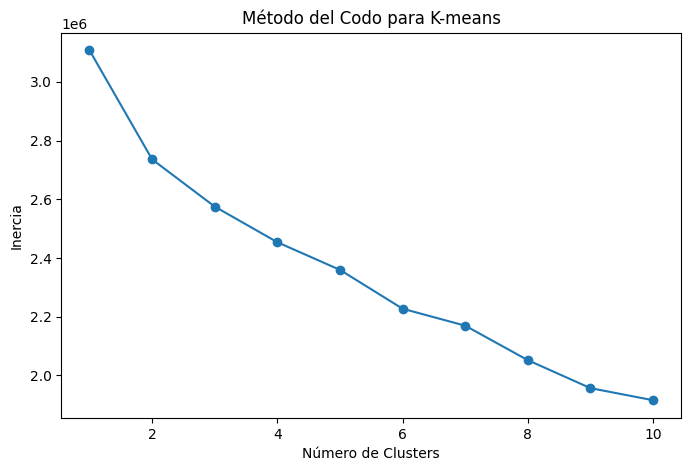

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_copy.values)  # df_copy con solo columnas numéricas

# Método del Codo para determinar el número óptimo de clusters
# inertia: the sum of squared distances of samples to their closest cluster center.
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.show()

**Silhouette Score**

In [ ]:
# Solo el 10% de los datos de X_scaled para que cuando se corra el codifo sea mas rapido
sample_size = int(0.1 * X_scaled.shape[0])  # 10% de la cantidad de filas
indices = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
X_sampled = X_scaled[indices]

silhouette_scores = []

# Silhouette scores para K de 2 a 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_sampled)
    score = silhouette_score(X_sampled, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score para {k} clusters: {score:.2f}")

Silhouette Score para 2 clusters: 0.12
Silhouette Score para 3 clusters: 0.11
Silhouette Score para 4 clusters: 0.09
Silhouette Score para 5 clusters: 0.09
Silhouette Score para 6 clusters: 0.10
Silhouette Score para 7 clusters: 0.10
Silhouette Score para 8 clusters: 0.11
Silhouette Score para 9 clusters: 0.11
Silhouette Score para 10 clusters: 0.11


**Calinski Harabasz Score**

K=2: Calinski-Harabasz Score = 17594.476205635932
K=3: Calinski-Harabasz Score = 13391.38718134298
K=4: Calinski-Harabasz Score = 11505.12579026143
K=5: Calinski-Harabasz Score = 10265.594816290048
K=6: Calinski-Harabasz Score = 10239.028539086014
K=7: Calinski-Harabasz Score = 9334.68514313415
K=8: Calinski-Harabasz Score = 9518.681432334512
K=9: Calinski-Harabasz Score = 9522.2144785223
K=10: Calinski-Harabasz Score = 8955.02846791194


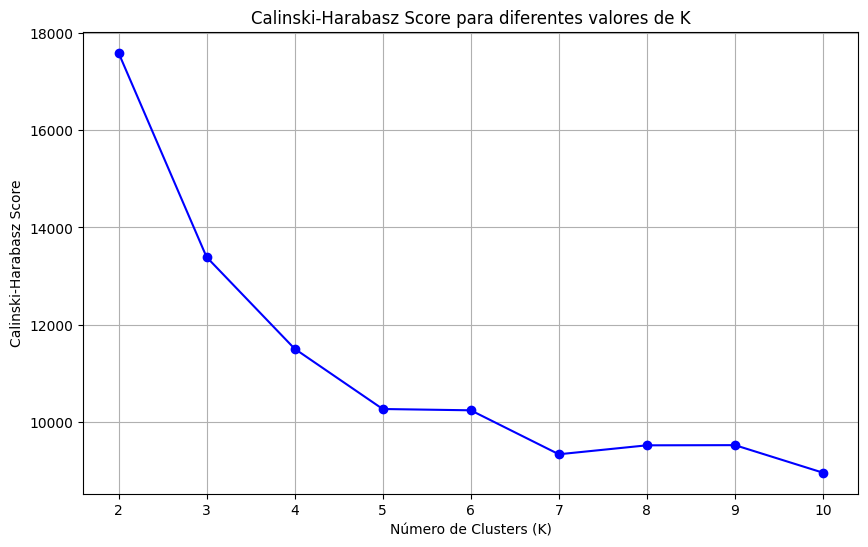

In [ ]:
# Probando con valores de K entre 2 y 10
k_values = range(2, 11)
results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, cluster_labels)
    results[k] = score

for k, score in results.items():
    print(f"K={k}: Calinski-Harabasz Score = {score}")

plt.figure(figsize=(10, 6))
plt.plot(k_values, list(results.values()), marker='o', color='b')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score para diferentes valores de K')
plt.grid(True)
plt.xticks(k_values)
plt.show()

1. **Método del Codo**
    * El "codo" parece encontrarse entre los valores K=2, K=3 y K=4.
    * K= 2 pudiera esta sobre simplificando la data.
    * K = 3 o k = 4 podria ser un buen equilibrio entre la simplicidad y la complejidad de la data. Despues de esos puntos se ve una reduccion gradual en el grafico.

2. **Silhouette Score**
    * El valor mas grande que se observo fue cuando k=2. Sin embargo, la diferencia con los otros valores no es considerable, lo que sugiere que los datos no tienen una división clara entre los clusters.

3. **Calinski-Harabasz Score**
    * El valor mas alto que se observo fue cuando k=2. Confirmando que 2 clusters pueden capturar adecuadamente las diferencias entre los grupos.

**Conclusión**:

La eleccion de k=2 parace ser una buena opción. Este numero de clusters nos ayudara a identificar los grupos de pasajeros satisfechos o insatisfechos del dataset.

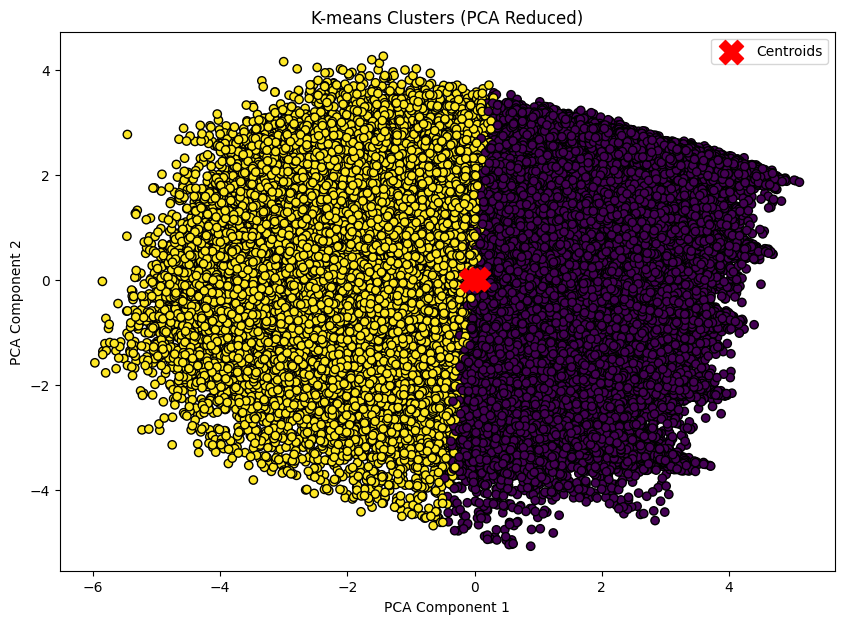

In [ ]:
# Reducir dimensiones a 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajustar KMeans con el valor de k = 2
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

df_copy["Cluster"] = kmeans.labels_

numeric_df = df_copy.select_dtypes(include=[np.number])
numeric_df = numeric_df.copy()
numeric_df["Cluster"] = df_copy["Cluster"]

# Group by cluster y calcular el promedio
cluster_summary = numeric_df.groupby("Cluster").mean()
print(cluster_summary.to_markdown())


|   Cluster |      ID |   Gender |     Age |   Customer Type |   Type of Travel |   Flight Distance |   Departure Delay |   Arrival Delay |   Departure and Arrival Time Convenience |   Ease of Online Booking |   Check-in Service |   Online Boarding |   Gate Location |   On-board Service |   Seat Comfort |   Leg Room Service |   Cleanliness |   Food and Drink |   In-flight Service |   In-flight Wifi Service |   In-flight Entertainment |   Baggage Handling |   Class_Economy |   Class_Economy Plus |
|----------:|--------:|---------:|--------:|----------------:|-----------------:|------------------:|------------------:|----------------:|-----------------------------------------:|-------------------------:|-------------------:|------------------:|----------------:|-------------------:|---------------:|-------------------:|--------------:|-----------------:|--------------------:|-------------------------:|--------------------------:|-------------------:|----------------:|--------------------

**Características de Clusters**:
* **Cluster 0**:
    * **Edad** media es de 41 años
    * El **tipo de cliente** mas comun es el cliente frecuentes (Returning).
    * **Distancia de Vuelo** es un promedio de 1415.77, indicando que este cluster tiene vuelos de distancias mas largas
    * **Delays** moderados en el despegue como en el aterrizaje.
    * Servicios que mas valoran son:
              * Seat Comfort
              * Cleanliness
              * In-Flight Service
              * In-flight Entertainment
              * Baggage Handling
    * Cluster 0 representa un grupo mayormente satisfecho con los servicios ofrecidos.

* **Cluster 1**:
    * **Edad** media es de 37 años
    * **Distancia de Vuelo** es un promedio de 946.36, lo que indica que grupo realiza vuelos más cortos en comparación con el Cluster 0.
    * Tiene mas **delays** tanto en el despegue como en el aterrizaje.
    * Cluster no está satisfecho con los servicios ofrecidos, con un promedio de satisfacción de 3.14 o menos para la mayoría de los servicios.

**Conclusión**:

El Cluster 0 parece estar compuesto por mas viajeros frecuentes, que realizan vuelos más largos y están bastante satisfechos con los servicios.

El Cluster 1, por otro lado, incluye a pasajeros de vuelos más cortos, con más retrasos y una mayor insatisfacción con los servicios.



### **Clasificación**

#### Regresión Logística

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


features = ['In-flight Wifi Service', 'Departure and Arrival Time Convenience',
                      'Ease of Online Booking', 'Gate Location', 'Food and Drink',
                      'Online Boarding', 'Seat Comfort', 'In-flight Entertainment',
                      'On-board Service', 'Leg Room Service', 'Baggage Handling',
                      'Check-in Service', 'In-flight Service', 'Cleanliness',
                      "Gender", "Customer Type", "Type of Travel"
                     ]
target = 'Satisfaction'

X = df[features]  # Características
y = df[target]  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajustar y transformar los datos de entrenamiento
X_test = scaler.transform(X_test)  # Transformar los datos de prueba

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Reporte de clasificación
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8689
Confusion Matrix:
[[13204  1481]
 [ 1915  9298]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14685
           1       0.86      0.83      0.85     11213

    accuracy                           0.87     25898
   macro avg       0.87      0.86      0.87     25898
weighted avg       0.87      0.87      0.87     25898



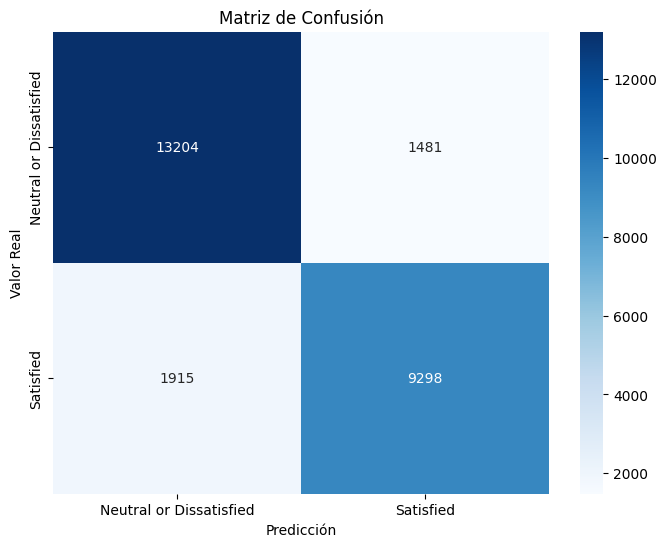

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Gráfico para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Neutral or Dissatisfied", "Satisfied"], yticklabels=["Neutral or Dissatisfied", "Satisfied"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

* 13204: Predicciones correctas para la clase 0 (modelo predijo "0" cuando realmente era "0").
* 1481: Falsos positivos (modelo predijo "1" cuando en realidad era "0").
* 1915: Falsos negativos (modelo predijo "0" cuando en realidad era "1").
* 9298: Predicciones correctas para la clase 1 (modelo predijo "1" cuando realmente era "1").

El modelo parece tener un buen desempeño general, con un accuracy del 86.89%.
Aunque la precisión y recall para ambas clases están bastante equilibradas, la clase "1" tiene un recall ligeramente inferior, lo que podría implicar que el modelo está perdiendo algunas instancias positivas (falsos negativos).
Sin embargo, el F1-score ponderado de 0.87 sugiere que el modelo está logrando un buen balance en general.

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
dt_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt:.4f}')

# Matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(f'Confusion Matrix:\n{conf_matrix_dt}')

# Reporte de clasificación
class_report_dt = classification_report(y_test, y_pred_dt)
print(f'Classification Report:\n{class_report_dt}')


Accuracy: 0.9429
Confusion Matrix:
[[13918   767]
 [  712 10501]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14685
           1       0.93      0.94      0.93     11213

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898



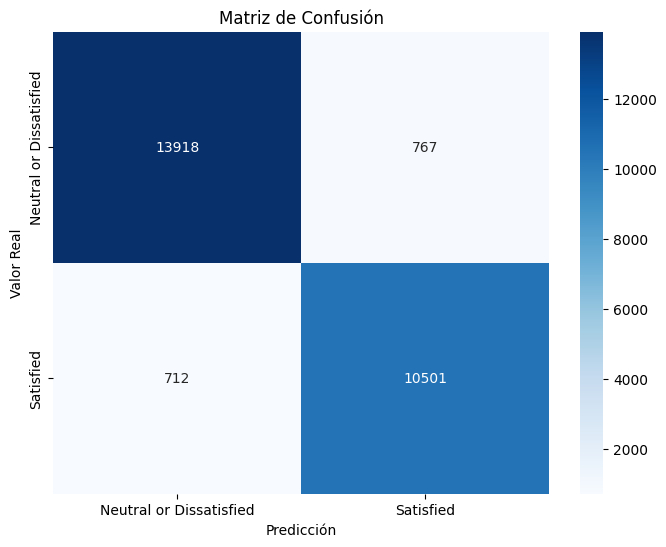

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Gráfico para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Neutral or Dissatisfied", "Satisfied"], yticklabels=["Neutral or Dissatisfied", "Satisfied"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

* 13918: Predicciones correctas para la clase 0.
* 767: Falsos positivos (el modelo predijo que la clase era "1" cuando realmente era "0").
* 712: Falsos negativos (el modelo predijo que la clase era "0" cuando realmente era "1").
* 10501: Predicciones correctas para la clase 1.

El modelo alcanzó un 94.29% de accuracy, superando significativamente el desempeño de la Regresión Logística. Las métricas detalladas muestran un F1-Score promedio de 94%, con un recall de 95% para la clase Neutral or Dissatisfied y 94% para la clase Satisfied. Este desempeño indica que el modelo puede identificar correctamente a los pasajeros satisfechos e insatisfechos con un alto nivel de precisión y balance.

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.4f}')

# Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f'Confusion Matrix:\n{conf_matrix_rf}')

# Reporte de clasificación
class_report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n{class_report_rf}')

Accuracy: 0.9598
Confusion Matrix:
[[14335   350]
 [  690 10523]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14685
           1       0.97      0.94      0.95     11213

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



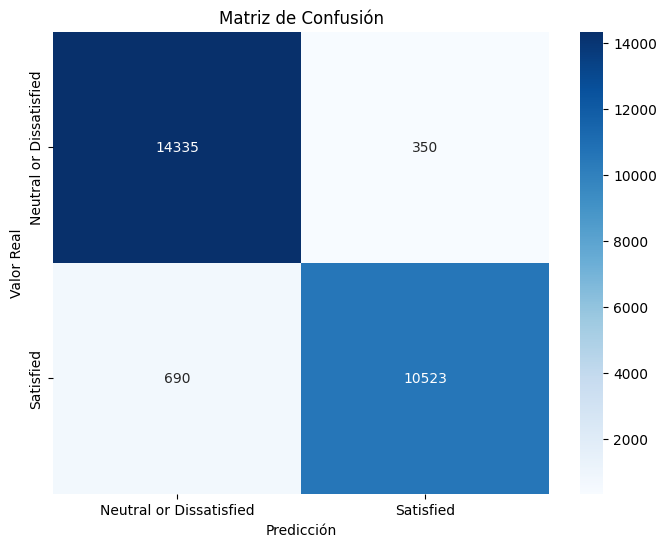

In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Gráfico para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Neutral or Dissatisfied", "Satisfied"], yticklabels=["Neutral or Dissatisfied", "Satisfied"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

* 14335: Predicciones correctas para la clase 0.
* 350: Falsos positivos (el modelo predijo que la clase era "1" cuando realmente era "0").
* 690: Falsos negativos (el modelo predijo que la clase era "0" cuando realmente era "1").
* 10523: Predicciones correctas para la clase 1.

Random Forest ha superado las expectativas con un rendimiento muy alto.
Las métricas son excelentes en cuanto a precisión, recall y F1-score para ambas clases.
El modelo parece estar bien equilibrado y es eficaz para hacer predicciones tanto de la clase 0 como de la clase 1.


La precisión general del modelo de Bosque Aleatorio en el conjunto de prueba es de aproximadamente el 96%. Esto significa que el modelo predijo correctamente la etiqueta objetivo para aproximadamente el 96% de las instancias en el conjunto de prueba e indica un buen rendimiento general. Los resultados indican que el modelo logra una alta precisión y un rendimiento equilibrado en ambas clases.

#### Validación cruzada: K-Fold

Para evaluar el rendimiento de los modelos que hemos entrenado de una forma más fiable, utilizaremos la técnica de validación cruzada K-Fold. Esto nos permitirá asegurar que el modelo es capaz de generalizar bien a datos no vistos, ya que se usan diferentes porciones del conjunto de datos para el entrenamiento y la prueba en múltiples iteraciones.

Dado el tamaño de nuestro *dataset*, usaremos una k = 10, que, junto a k = 5, suelen ser un punto de partida habitual para obtener estimaciones fiables. Hacer diez pliegues nos permitirá ganar estabilidad y asegurar que el modelo puede enfrentarse a diferentes escenarios con los datos de cada iteración.

In [ ]:
from sklearn.model_selection import cross_val_score

k = 10

# Regresión Logística
cv_log = cross_val_score(model, X, y, cv=k, scoring='accuracy')
print("Regresión Logística - Cross-Validation Scores:", cv_log)
print(f"Mean Accuracy: {np.mean(cv_log):.3f} ± {np.std(cv_log):.3f}")

# Árbol de Decisión
cv_dt = cross_val_score(dt_model, X, y, cv=k, scoring='accuracy')
print("\nÁrbol de Decisión - Cross-Validation Scores:", cv_dt)
print(f"Mean Accuracy: {np.mean(cv_dt):.3f} ± {np.std(cv_dt):.3f}")

# Random Forest
cv_rf = cross_val_score(rf_model, X, y, cv=k, scoring='accuracy')
print("\nRandom Forest - Cross-Validation Scores:", cv_rf)
print(f"Mean Accuracy: {np.mean(cv_rf):.3f} ± {np.std(cv_rf):.3f}")

Regresión Logística - Cross-Validation Scores: [0.87728782 0.83674415 0.8383659  0.8425361  0.87898679 0.8810719
 0.88153525 0.88577386 0.88724127 0.879827  ]
Mean Accuracy: 0.869 ± 0.020

Árbol de Decisión - Cross-Validation Scores: [0.9495714  0.93134605 0.92655804 0.93103715 0.94393389 0.94733184
 0.94501506 0.94810009 0.9514983  0.95057152]
Mean Accuracy: 0.942 ± 0.009

Random Forest - Cross-Validation Scores: [0.96509383 0.94486061 0.94323886 0.94393389 0.96053749 0.9647077
 0.96231369 0.96377819 0.96733086 0.96424158]
Mean Accuracy: 0.958 ± 0.009


Como muestran los resultados, el *random forest*, seguido del árbol de decisión, demuestran ser los mejores modelos en términos de precisión (95,8% y 94,2%) y estabilidad (0.009).

La regresión logística, aunque sea inferior al resto de modelos, tiene un buen rendimiento con una media de precisión que se aproxima al 87%. Sin embargo, con una desviación estándar de 0.020, podemos ver que tiene mayor variabilidad entre los pliegues, lo que sugiere que el modelo es más sensible a cómo se dividien los datos en cada *fold* durante la validación cruzada.

A continuación se muestra una visualización de los resultados de la precisión de cada modelo:

<ipython-input-37-644f3ff60b8c>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cv_log, cv_dt, cv_rf], labels=["Logistic Regression", "Decision Tree", "Random Forest"])


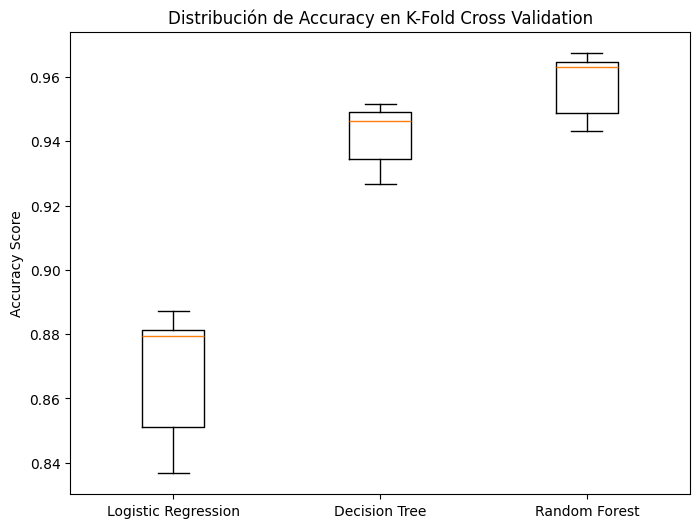

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot([cv_log, cv_dt, cv_rf], labels=["Logistic Regression", "Decision Tree", "Random Forest"])
plt.ylabel("Accuracy Score")
plt.title("Distribución de Accuracy en K-Fold Cross Validation")
plt.show()

#### Curva ROC y AUC-ROC

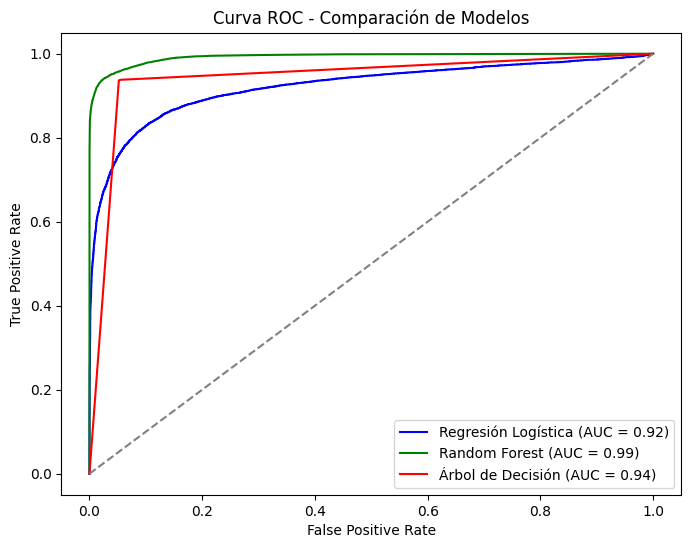

In [ ]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades de predicción
y_proba_log = model.predict_proba(X_test)[:, 1]  # Regresión Logística
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Random Forest
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Árbol de Decisión


# Calcular la curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)


# Calcular AUC
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_dt = auc(fpr_dt, tpr_dt)


# Grafica
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_dt, tpr_dt, label=f'Árbol de Decisión (AUC = {auc_dt:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Línea de referencia

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Comparación de Modelos')
plt.legend()
plt.show()

El `área debajo de la curva (AUC)` indica un rendimiento excelente en la distinción entre las clases en todos los casos, lo cual quiere decir que nuestros modelos tienen una capacidad de acierto muy alta al momento de escoger entre **Satisfied** o **Neutral or Dissatisfied**. La forma de la curva también sugiere que el modelo es consistentemente bueno en diferentes umbrales de clasificación.

La regresión logística tiene un 92% de probabilidades de que el modelo asigne un valor más alto a una instancia positiva que a una negativa. Mientras, el *random forest* y el *árbol de decisión* presentan porcentajes más altos, llegando incluso al 99%.

Este último dato, junto al resto de métricas que hemos valorado anteriormente, nos lleva a pensar que el hecho de que se esté dando overfitting con el *random forest* y el árbol de decisión sea muy probable. Es por este motivo que a continuación visualizaremos la curva de aprendizaje para poder comparar los *scores* de train y test para cada modelo:

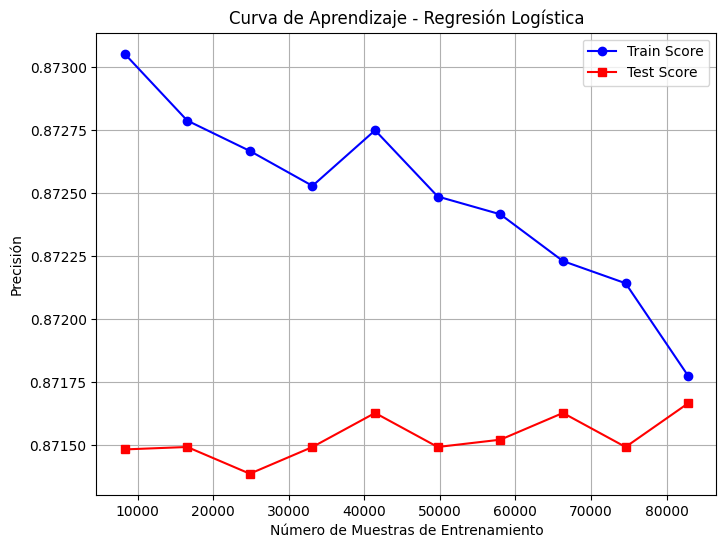

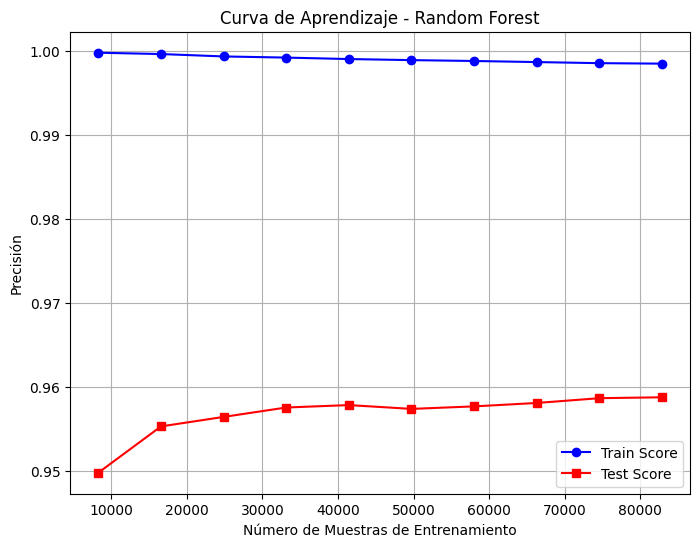

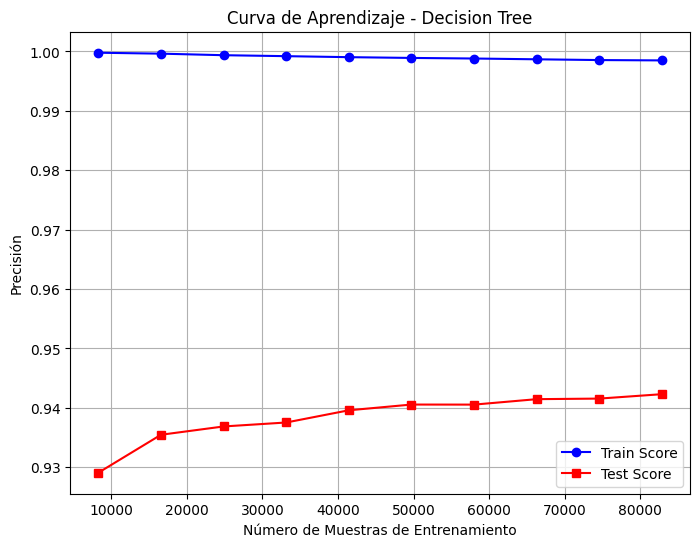

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Train Score", color="blue", marker="o")
    plt.plot(train_sizes, test_mean, label="Test Score", color="red", marker="s")

    plt.xlabel("Número de Muestras de Entrenamiento")
    plt.ylabel("Precisión")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Graficar para cada modelo
plot_learning_curve(model, X_train, y_train, "Curva de Aprendizaje - Regresión Logística")
plot_learning_curve(rf_model, X_train, y_train, "Curva de Aprendizaje - Random Forest")
plot_learning_curve(dt_model, X_train, y_train, "Curva de Aprendizaje - Decision Tree")

Mientras las curvas de train score y test score tienden a converger en el caso de la regresión logística, las curvas del *random forest* y del árbol de decisión muestran estar lejos de seguir la misma tendencia.

Esto quiere decir que, al contrario de la regresión logística, que demuestra ser capaz de generalizar bien, el *random forest* y el árbol de decisión están memorizando en lugar de generalizar.

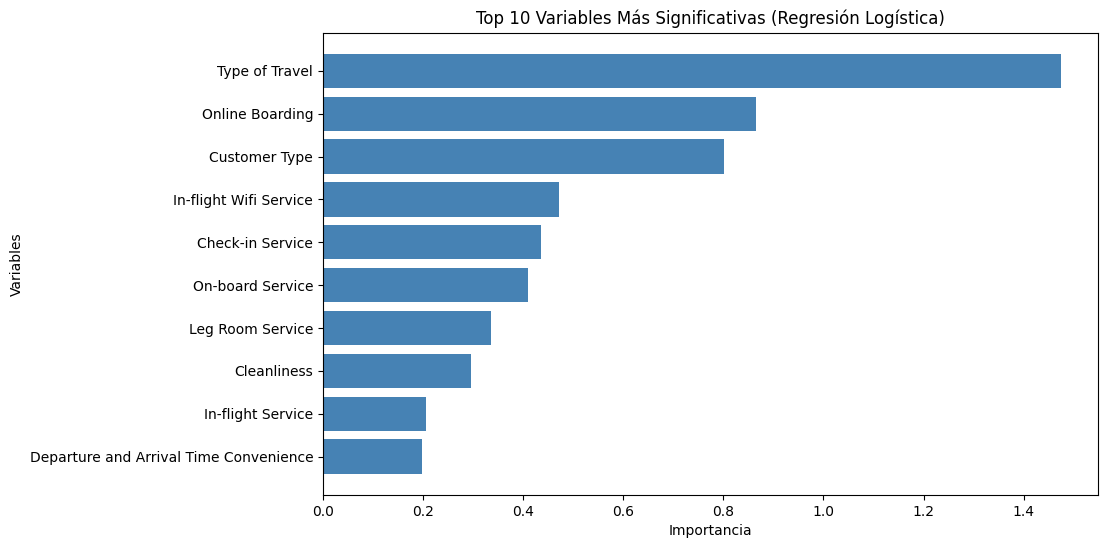

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Obtener los coeficientes absolutos de la Regresión Logística
coefficients = np.abs(model.coef_[0])  # model es la regresión logística ajustada
features = X.columns  # Nombre de las características

# Crear un DataFrame con la importancia de cada variable
coef_df = pd.DataFrame({'Feature': features, 'Importance': coefficients})
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Graficar las variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'][:10], coef_df['Importance'][:10], color='steelblue')  # Top 10
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Top 10 Variables Más Significativas (Regresión Logística)')
plt.gca().invert_yaxis()  # Invertir eje para que las más importantes estén arriba
plt.show()


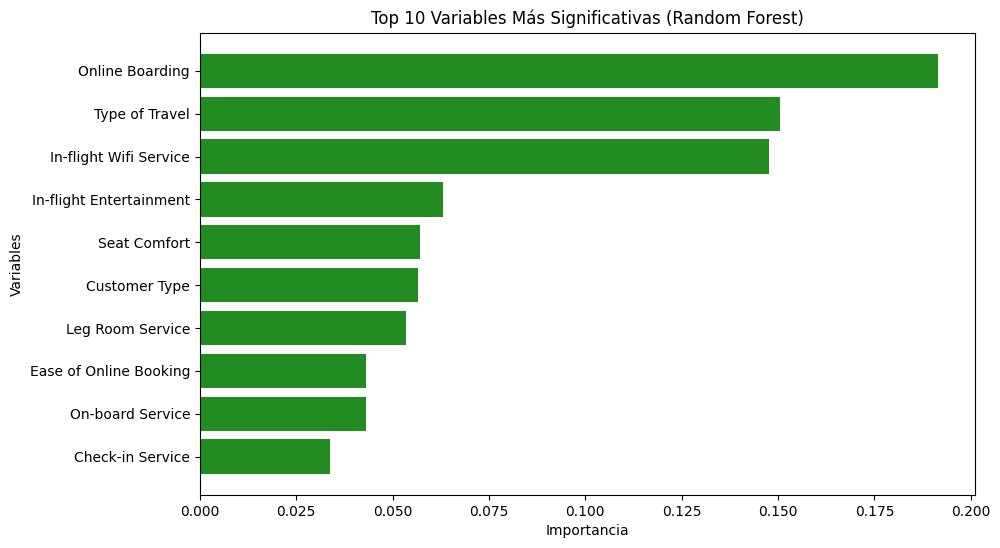

In [ ]:
# Obtener la importancia de las variables en Random Forest
importances = rf_model.feature_importances_
features = X.columns

# Crear un DataFrame
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'][:10], rf_importance_df['Importance'][:10], color='forestgreen')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Top 10 Variables Más Significativas (Random Forest)')
plt.gca().invert_yaxis()
plt.show()


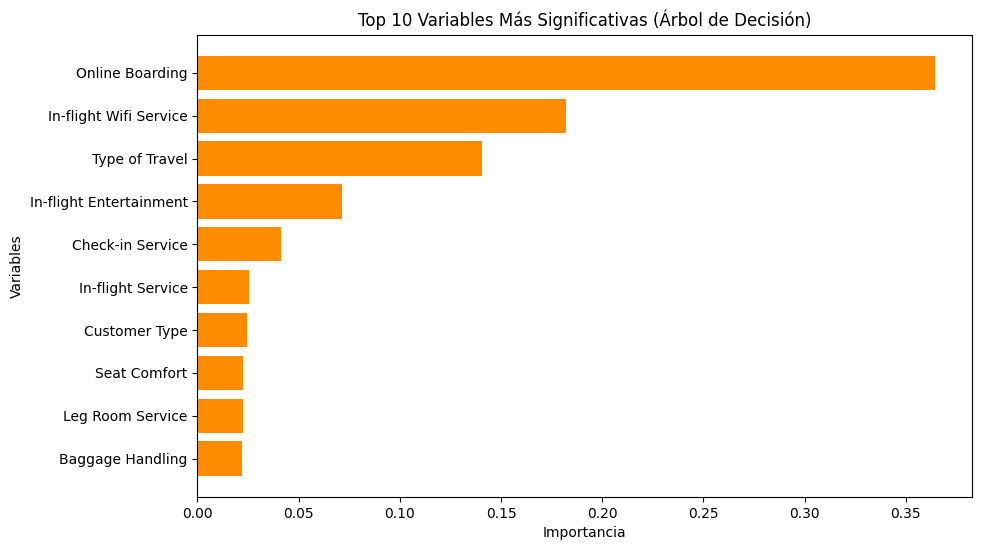

In [ ]:
# Obtener la importancia de las características del Árbol de Decisión
importances = dt_model.feature_importances_  # dt_model es el árbol de decisión ajustado
features = X.columns  # Nombre de las características

# Crear un DataFrame con la importancia de cada variable
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las variables más importantes
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='darkorange')  # Top 10
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Top 10 Variables Más Significativas (Árbol de Decisión)')
plt.gca().invert_yaxis()
plt.show()

Las variables que aparecen consistentemente en el top 3 de variables más significativas son:

*   Online Boarding  (rating de `1`, `2`, `3`, `4` o `5`)
*   Type of travel  (`Business` o `Personal`)

Seguidas de:

*   In-flight wifi service  (rating de `1`, `2`, `3`, `4` o `5`)
*   Customer type (`First-time` o `Returning`)







### Conclusión

Entre las opciones de aprendizaje supervisado que se han trabajado para el *dataset* de clasificación, el modelo de regresión logística es la opción más acertada para realizar predicciones. Su rendimiento ha sido bueno en términos de precisión y, a diferencia del resto de modelos, ha demostrado tener capacidad para generalizar a datos nuevos.